In [1]:
from lib.excel_reader import ExcelReader
from lib.data_plotter import DataPlotter
import pandas as pd

In [2]:
def separate_columns(dataframes, columns_of_interest):
    """Separa columnas específicas en un nuevo DataFrame y verifica excepciones."""
    separated_dataframes = []

    for sheet_name, df in dataframes.items():
        try:
            # Asegurarse de que las columnas de interés están en las posiciones correctas
            selected_columns = df.iloc[:, :len(columns_of_interest)]
            selected_columns.columns = columns_of_interest  # Renombrar columnas
            separated_dataframes.append(selected_columns)

        except Exception as e:
            print(f"Error al procesar {sheet_name}: {e}")

    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(separated_dataframes, ignore_index=True)

    return combined_df

In [3]:
def remove_columns(dataframes, columns_to_remove):
    """Quita columnas específicas de cada DataFrame en el diccionario."""
    for sheet_name in dataframes.keys():
        dataframes[sheet_name].drop(
            columns=columns_to_remove, inplace=True, errors='ignore')

In [4]:
def transpose_df(dataframes):
    """Transpone cada DataFrame en el diccionario."""
    for sheet_name in dataframes.keys():
        dataframes[sheet_name] = dataframes[sheet_name].T.reset_index(
            drop=True)

In [5]:
def clean_columns(dataframes, row):
    """Nombra cada DataFrame en el diccionario de acuerdo a una fila específica."""
    for sheet_name in dataframes.keys():
        dataframes[sheet_name] = dataframes[sheet_name].iloc[1:].rename(
            columns=dataframes[sheet_name].iloc[row])

In [6]:
def clean_limit(value):
    if pd.isna(value):
        return value
    elif '-' in str(value):
        return str(value).split('-')[0]
    elif '<' in str(value) or '>' in str(value):
        return value
    else:
        return value

In [7]:
file_path = './data/water_quality.xlsx'
sheet_to_exclude = []  # Por ejemplo, ['Ubicación', 'Mapas']
start_cell = (0, 0)  # Por ejemplo, (0, 0) para A1

excel_reader = ExcelReader(file_path)
dataframes = excel_reader.read_excel_sheets(sheet_to_exclude, start_cell)

In [8]:
dataframes.keys()

dict_keys(['PSDH', 'SDPH', 'SDPL-30', 'SDPL-40', 'SDPL-50', 'PSDH-20', 'SDPS', 'SDPL-60', 'SDPL-70', 'SDPL-80', 'PSDS-20', 'PROP-4', 'P-10', 'PH-SH17-101', 'PH-SH17-102.', 'PH-SH16-2A', 'PH-SH16-03'])

In [9]:
titles = {'PSDH' : 'Poza subdrenaje Higuerón',
         'SDPH' : 'Subdrenaje Poza Higuerón (subdrenaje de la poza de subdrenajes Higuerón)',
         'SDPL-30' : 'Subdrenaje Pad de Lixiviación (agua del sub dren a la poza de subdrenajes\nquebrada Higuerón tubera Sur)',
         'SDPL-40' : 'Subdrenaje Pad de Lixiviación (agua del sub dren a la poza de subdrenajes\nquebrada Higuerón tubera Central)',
         'SDPL-50' : 'Subdrenaje Pad de Lixiviación (agua del sub dren a la poza de subdrenajes\nquebrada Higuerón tubera norte)',
         'PSDH-20' : ' Poza de Subdrenaje Higuerón (descarga de poza subdren de Higueron)',
         'SDPS' : 'Subdrenaje poza Sauce (agua que sale del subdrenaje de la poza de de subdrenajes Sauce)',
         'SDPL-60' : 'Sub drenaje Pad de lixiviación (pad 2B: descarga el agua de sub dren en\nquebrada Sauce tubería Sur)',
         'SDPL-70' : 'Sub drenaje Pad de lixiviación (sub drenaje Pad 2B: descarga el agua de sub dren en\nquebrada Sauce tubería central)',
         'SDPL-80' : 'Sub drenaje Pad de lixiviación (pad 2B: descarga el agua de sub dren en\nquebrada Sauce tubería norte)',
         'PSDS-20' : 'Poza de subdrenaje Sauce (descarga de agua proveniente de la poza de\nsubdrenajes geomembrana Sauce)',
         'PROP-4' : 'Piezómetro Higuerón',
         'P-10' : 'Piezómetro Sauce',
         'PH-SH17-101' : 'Piezómetro dique pad 2B Higuerón al costado del desarenador',
         'PH-SH17-102.' : 'Piezómetro dique pad 2B Quebrada Sauce solo se puede medir nivel freático',
         'PH-SH16-2A' : 'Piezómetro dique PME',
         'PH-SH16-03' : 'Piezometro poza de sedimentacion Higuerón'}


In [10]:
columns_of_interest = [0, 1, 2]

# Separar columnas y obtener excepciones
interest_df = separate_columns(dataframes, columns_of_interest)

In [11]:
# Eliminar duplicados
interest_df.drop_duplicates(inplace=True)

# Convertir la fila 0 en los nombres de las columnas
interest_df.columns = interest_df.iloc[0]

# Eliminar la fila 0 del DataFrame
interest_df = interest_df[1:]

# Cambiar el nombre de la columna
interest_df = interest_df.set_axis(
    ['sample', 'unit', 'limit'] + list(interest_df.columns[3:]), axis=1)

In [12]:
# Filtrar filas con valores NaN o que no contienen letras
interest_df = interest_df[interest_df['limit'].isna(
) | ~interest_df['limit'].astype(str).str.contains('[a-zA-Z]')]

# Aplicar la función clean_limit a la columna 'limit'
interest_df['limit'] = interest_df['limit'].apply(clean_limit)

# Filtrar nuevamente por valores numéricos o NaN
interest_df = interest_df[interest_df['limit'].isna(
) | interest_df['limit'].astype(str).str.match(r'^-?\d+(\.\d+)?$')]

In [13]:
interest_df

,sample,unit,limit
1,Conductividad in-situ,µS/cm,NaN
2,Oxígeno disuelto,mg/L,NaN
3,pH in-situ,pH,6
4,Q,L/s,NaN
5,Turbidez in-situ,NTU,NaN
...,...,...,...
1275,"Plomo total, Pb",mg/L,0.05
1277,"Selenio total, Se",mg/L,0.02
1289,"Zinc total, Zn",mg/L,2
1301,"Hierro disuelto, Fe",mg/L,NaN


In [14]:
columns_to_remove = [1, 2]  # Si usas índices de columnas

# Quitar columnas no deseadas
remove_columns(dataframes, columns_to_remove)
transpose_df(dataframes)

In [15]:
row = 0
clean_columns(dataframes, row)

In [16]:
dataframes['SDPH']

,Sample Date/Time,Conductividad in-situ,Oxígeno disuelto,pH in-situ,Q,Turbidez in-situ,Temperatura in-situ,Acidez,Sólidos totales disueltos,Sólidos totales suspendidos,...,"Estaño disuelto, Sn","Estroncio disuelto, Sr","Tantalio disuelto, Ta","Titanio disuelto, Ti","Talio disuelto, Tl","Uranio disuelto, U","Vanadio disuelto, V","Yterbio disuelto, Yb","Zirconio disuelto, Zr","Zinc disuelto, Zn"
1,2018-11-18 14:00:00,355,6.03,7.56,0.019,2.28,21.5,NaN,223,3,...,<0.00010,0.2612,<0.0021,<0.0006,<0.00006,0.001702,<0.0003,<0.00006,<0.00045,<0.0026
2,2018-12-14 09:40:00,285,6.29,7.37,0.503,16.2,20.3,NaN,174,10,...,<0.00010,0.1501,<0.0021,<0.0006,<0.00006,0.000829,<0.0003,<0.00006,<0.00045,<0.0026
3,2018-12-19 10:45:00,172.5,7.3,7.5,NaN,NaN,20.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-20 10:00:00,NaN,NaN,7.12,NaN,NaN,NaN,NaN,NaN,7.139,...,<0.00010,0.0703,<0.0021,0.011,0.00018,0.000187,<0.0003,0.00026,0.00281,0.0088
5,2018-12-22 14:50:00,119,7.31,6.86,NaN,5640,20.5,NaN,102,2043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2022-04-03 11:00:00,261.5,4.6,6.88,0.45,NaN,20.4,20.5,224,53,...,<0.00010,0.0942,<0.0021,0.0215,<0.00006,0.000049,<0.0003,<0.00006,0.00126,0.0138
107,2022-04-04 11:30:00,254.7,3.18,6.47,NaN,NaN,21.1,25.3,212,237,...,<0.00010,0.1071,<0.0021,0.0494,<0.00006,0.000268,0.004,0.00012,0.00317,0.0219
108,2022-04-20 13:40:00,308.4,6.38,6.82,NaN,NaN,22.6,3.9,195,87,...,<0.00010,0.1528,<0.0021,0.0022,<0.00006,0.00019,<0.0003,<0.00006,<0.00045,0.0271
109,2022-05-10 10:15:00,NaN,4.11,6.77,NaN,NaN,20,2.6,393,<3,...,<0.00010,0.1932,<0.0021,<0.0006,<0.00006,0.000433,<0.0003,<0.00006,<0.00045,0.0111


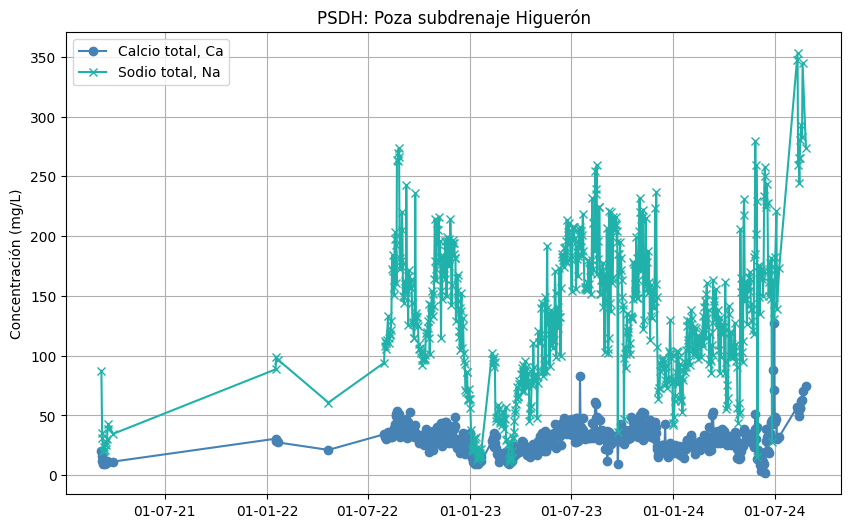

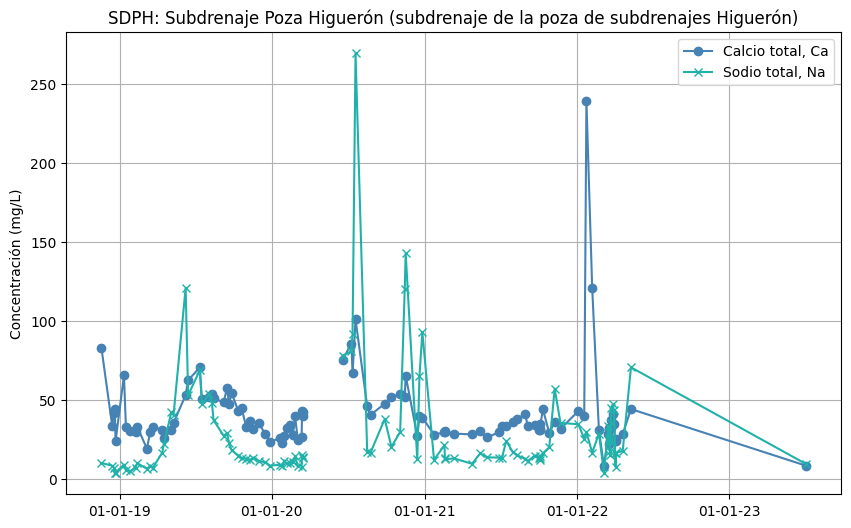

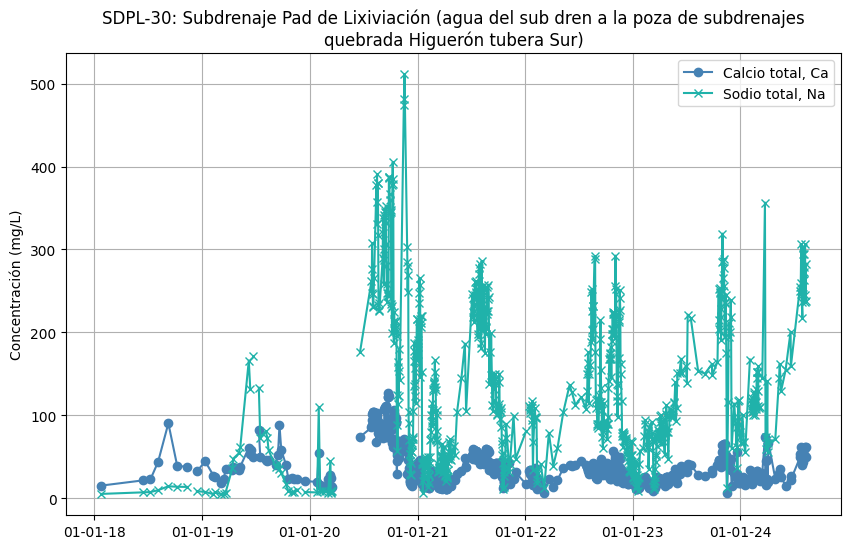

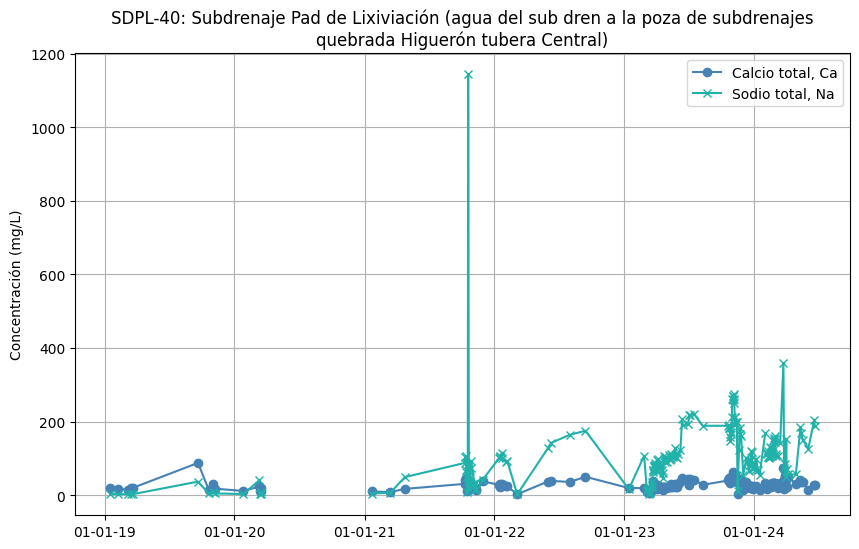

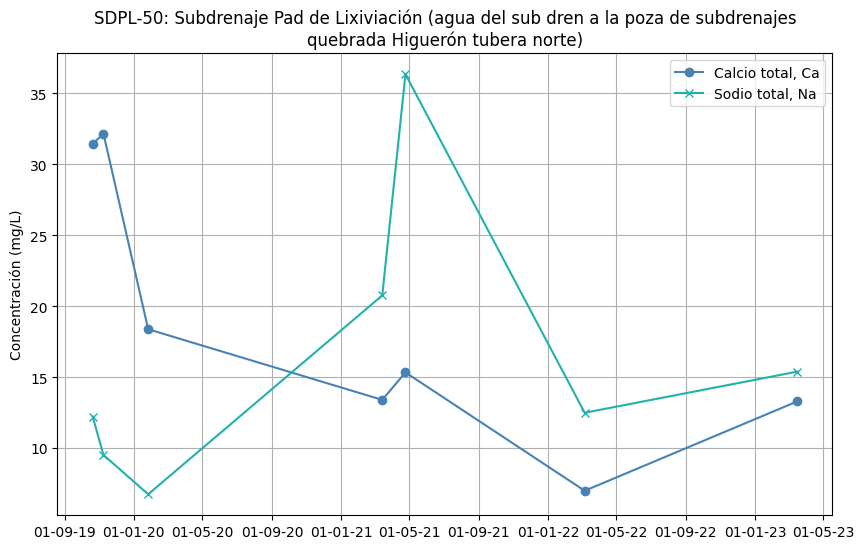

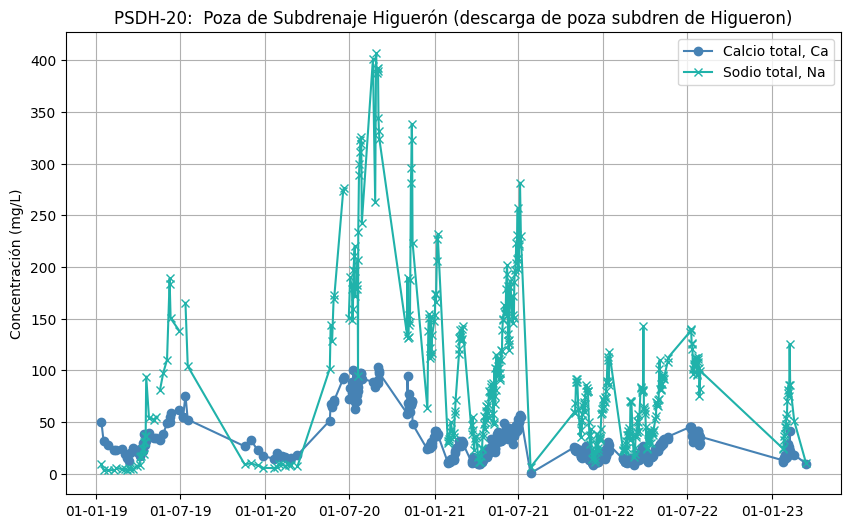

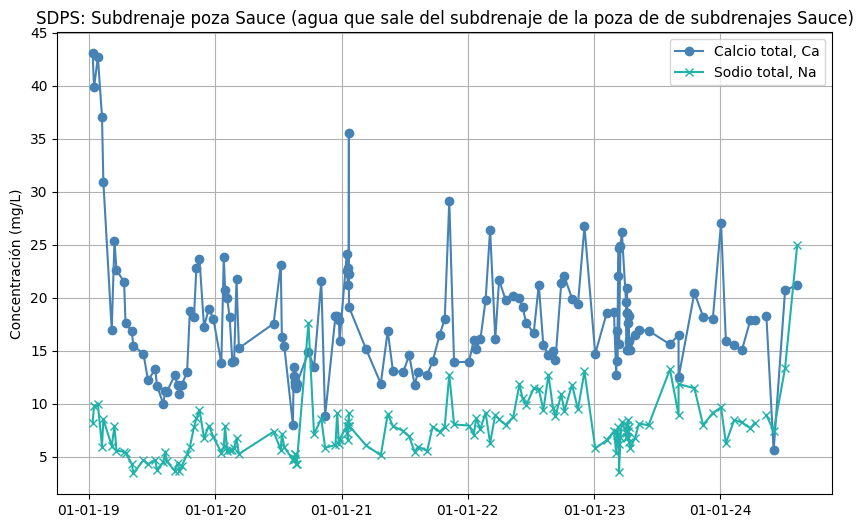

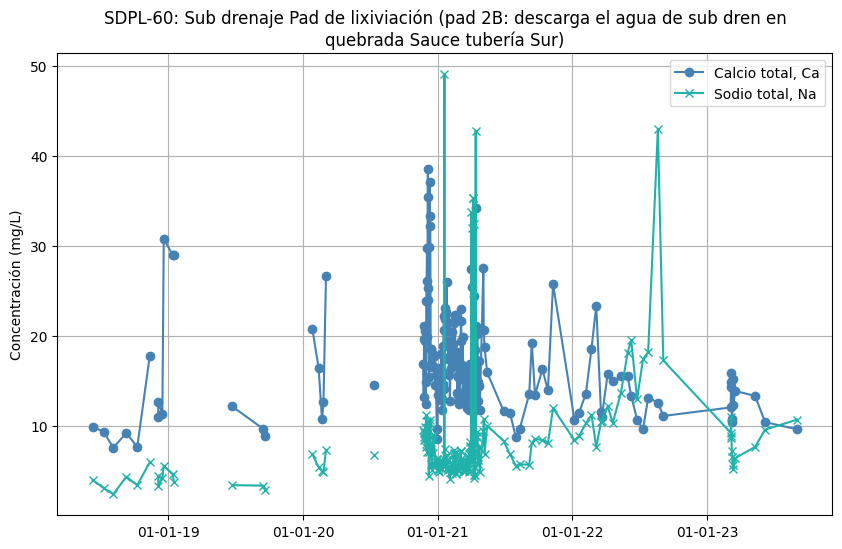

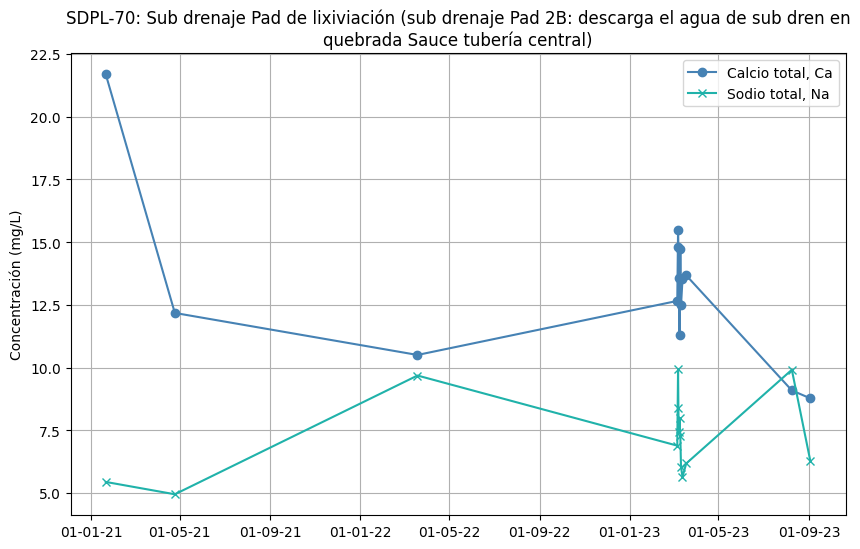

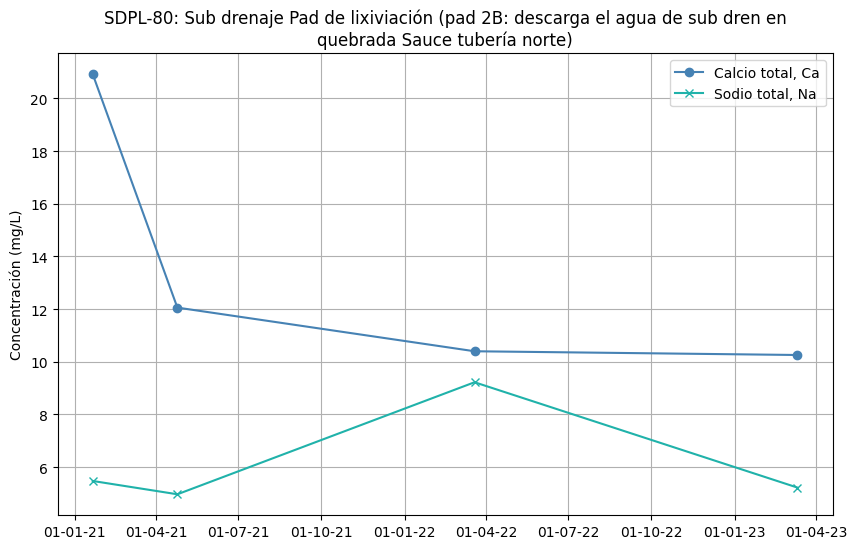

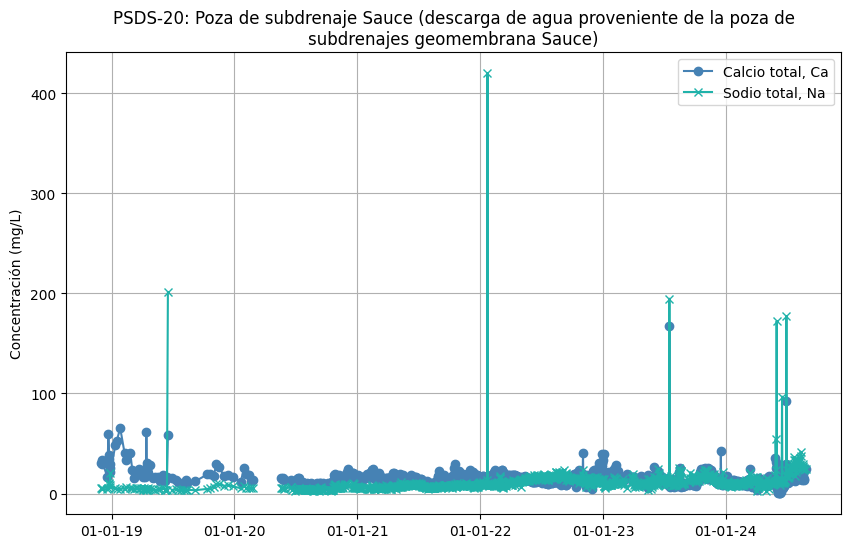

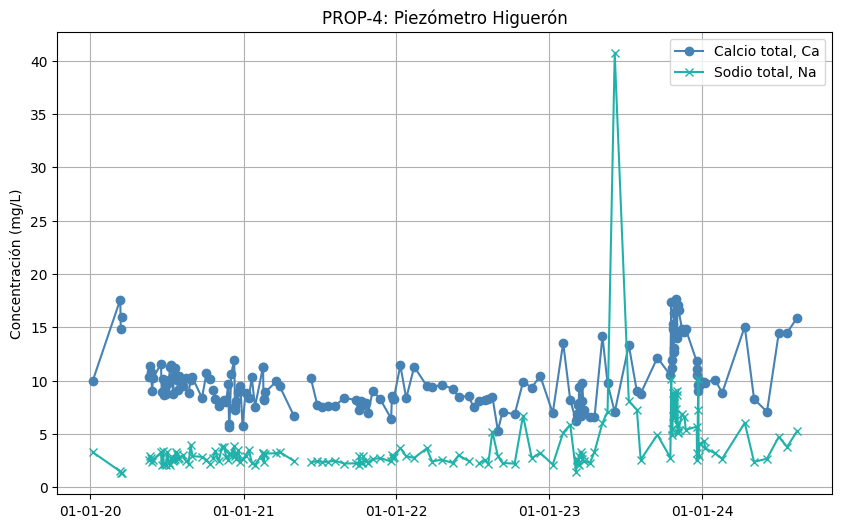

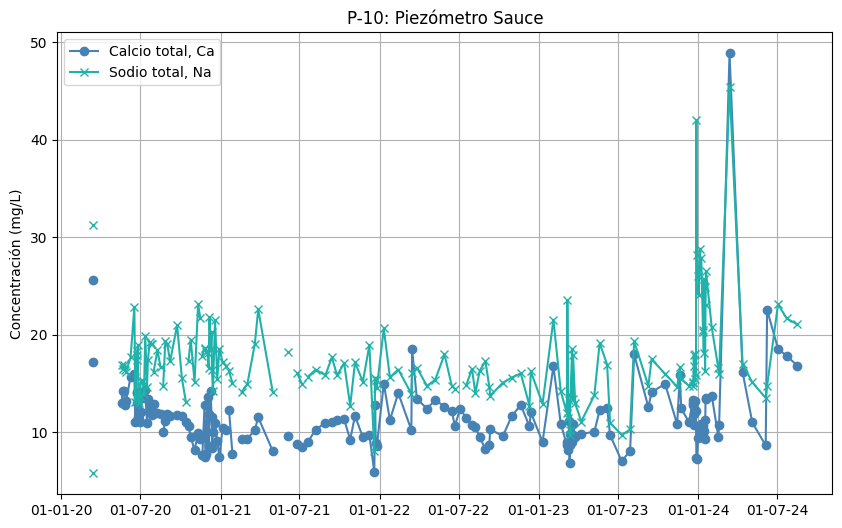

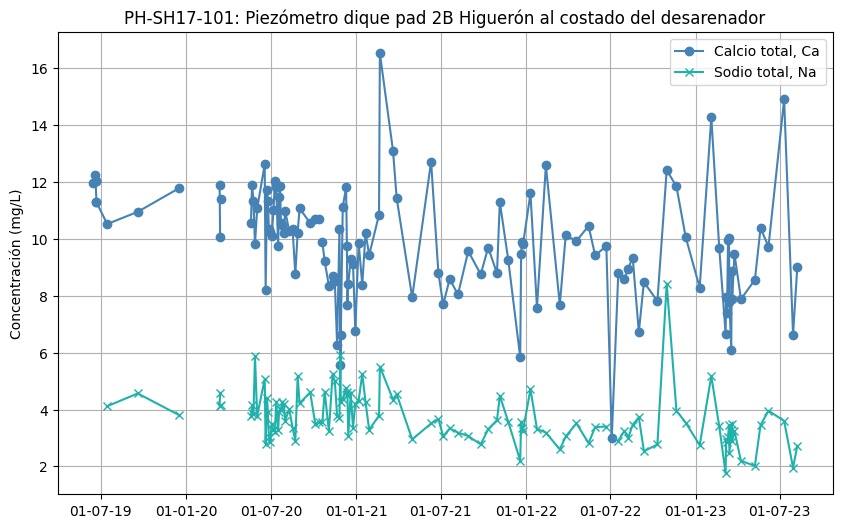

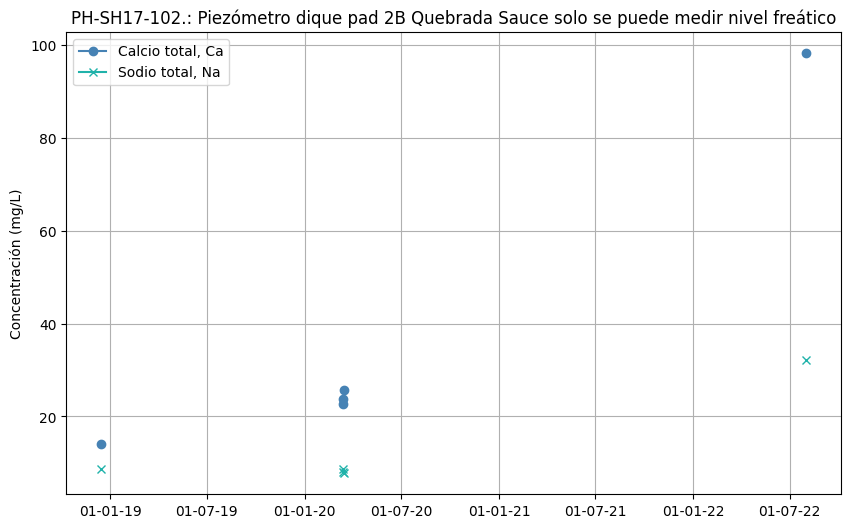

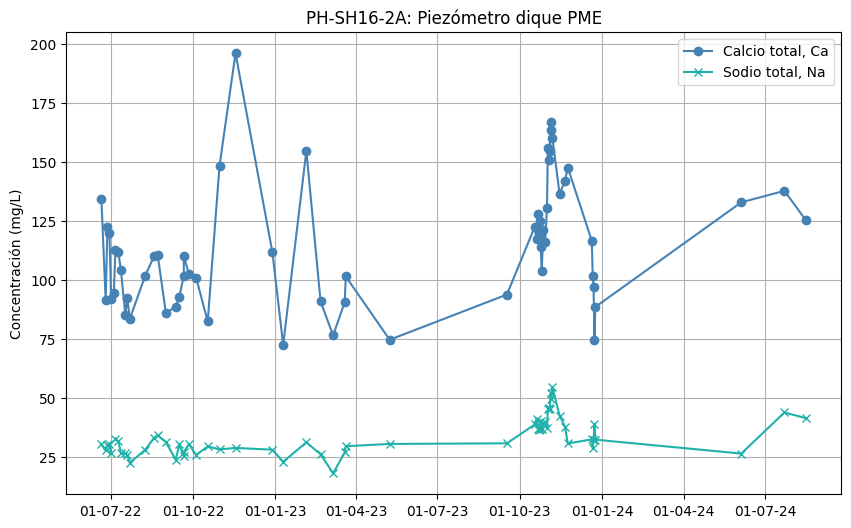

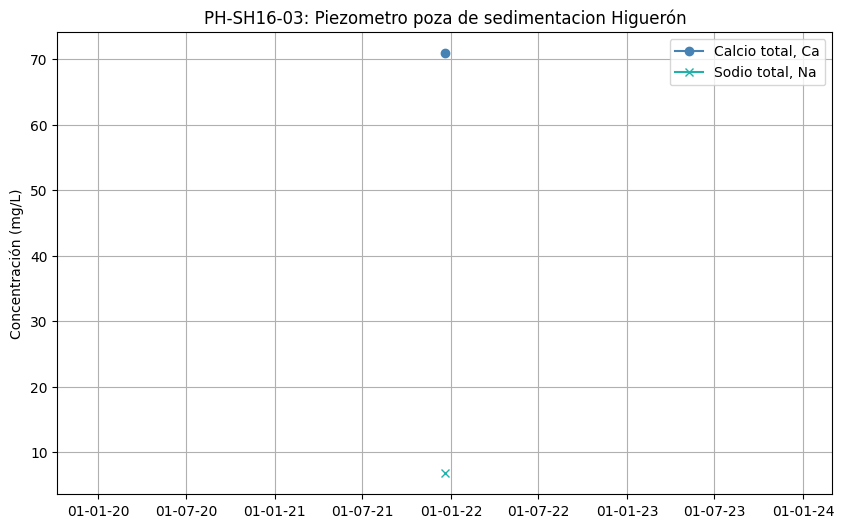

In [49]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import os

def plot_na_ca_total(df_dict):
    # Definir el directorio de salida
    output_dir = './var/Concentración de Calcio (Ca) y Sodio (Na)/'
    
    # Crear el directorio si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for name, df in df_dict.items():
        # Aseguramos que las columnas 'Na-Total' y 'Ca-Total' existen en el DataFrame
        if 'Calcio total, Ca' in df.columns and 'Sodio total, Na' in df.columns:
            fig, ax = plt.subplots(figsize=(10, 6))

            # Usamos la columna 0 para las fechas (eje X)
            dates = pd.to_datetime(df.iloc[:, 0], errors='coerce')  # Columna 0 para las fechas

            # Ploteamos Na-Total
            ax.plot(dates, df['Calcio total, Ca'], label='Calcio total, Ca', color='steelblue', marker='o')

            # Ploteamos Ca-Total
            ax.plot(dates, df['Sodio total, Na'], label='Sodio total, Na', color='lightseagreen', marker='x')

            # Formato del eje X con el formato mm-yy
            date_format = DateFormatter('%d-%m-%y')
            ax.xaxis.set_major_formatter(date_format)

            # Configuraciones del gráfico
            ax.set_title(f'{name}: {titles[name]}')
            ax.set_ylabel('Concentración (mg/L)')
            plt.xticks(rotation=0)  # Rotar las fechas para mejor visibilidad
            ax.legend()
            ax.grid(True)

            # Guardar gráfico en archivo
            plt.savefig(f'{output_dir}{name}.png', dpi=300)

# Supongamos que df_dict es tu diccionario de dataframes
plot_na_ca_total(dataframes)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import os

# Función para crear los gráficos
def plot_dataframes(df_dict, interest_df):
    # Asegurarse de que los valores de 'limit' son numéricos
    interest_df['limit'] = pd.to_numeric(interest_df['limit'], errors='coerce')
    
    # Definir la fecha de corte
    cutoff_date = pd.to_datetime('2021-01-01')

    for df_name, df in df_dict.items():
        # Convertir la primera columna a fechas
        dates = pd.to_datetime(df.iloc[:, 0], errors='coerce')
        
        # Filtrar las fechas posteriores al 01-01-2021
        date_mask = dates >= cutoff_date

        # Formato de fechas en el eje X
        date_format = DateFormatter("%d-%m-%y")
        
        for col in df.columns[1:]:
            # Asegurarse de que los valores en la columna son numéricos
            df[col] = pd.to_numeric(df[col], errors='coerce')
            non_null_mask = ~df[col].isnull()
            
            # Aplicar la máscara para las fechas y los valores no nulos
            combined_mask = non_null_mask & date_mask

            if combined_mask.any():  # Verificar que hay datos no nulos después del filtro
                # Crear la carpeta para cada columna si no existe
                column_folder = f'./var/{col}'
                os.makedirs(column_folder, exist_ok=True)
                
                fig, ax = plt.subplots(figsize=(10, 6))
                ax.plot(dates[combined_mask], df[col][combined_mask], label=col, marker='o')

                # Buscar información en el interest_df
                sample_info = interest_df.loc[interest_df['sample'] == col]
                if not sample_info.empty:
                    unit = sample_info['unit'].values[0]
                    limit = sample_info['limit'].values[0]
                else:
                    unit = "Unknown"
                    limit = np.nan

                # Título del eje Y
                ax.set_ylabel(f"{col} ({unit})", fontsize=12)
                
                # Si no hay un límite, graficar una línea de promedio
                if pd.isna(limit):
                    avg_value = df[col][combined_mask].mean()
                    ax.axhline(y=avg_value, color='blue', linestyle='--', label=f'Promedio: {avg_value:.2f} {unit}')
                    max_value_exceeded = False  # No hay límite excedido
                else:
                    # Si hay un límite, graficar la línea límite
                    ax.axhline(y=limit, color='red', linestyle='--', label=f'LMP: {limit} {unit}')
                    
                    # Filtrar los valores que exceden el límite
                    exceed_mask = df[col][combined_mask] > limit
                    if exceed_mask.any():
                        max_exceed_value = df[col][combined_mask][exceed_mask].max()
                        max_exceed_date = dates[combined_mask][exceed_mask][df[col][combined_mask] == max_exceed_value].iloc[0]

                        # Agregar punto sobre el máximo que excedió el límite
                        ax.scatter(max_exceed_date, max_exceed_value, color='red', zorder=5)
                        
                        # Anotación cerca del punto rojo
                        annotation = f"Valor máx.:\n{max_exceed_value:.2f} {unit}\n{max_exceed_date.strftime('%d-%m-%y')}"
                        ax.annotate(annotation, xy=(max_exceed_date, max_exceed_value*0.9), 
                                    xytext=(5, 5), textcoords='offset points', color='red',
                                    fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white"))
                        max_value_exceeded = True  # El valor máximo excedió el límite
                    else:
                        max_value_exceeded = False  # No se excedió el límite

                # Mostrar el valor máximo solo si no se excedió el límite
                if not max_value_exceeded:
                    max_value = df[col][combined_mask].max()
                    max_date = dates[combined_mask][df[col][combined_mask] == max_value].iloc[0]
                    ax.scatter(max_date, max_value, color='green', zorder=5)
                    
                    # Anotación cerca del valor máximo, sin agregarlo a la leyenda
                    annotation = f"Valor máx.:\n{max_value:.2f} {unit}\n{max_date.strftime('%d-%m-%y')}"
                    ax.annotate(annotation, xy=(max_date, max_value*0.9), 
                                xytext=(5, 5), textcoords='offset points', color='green',
                                fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white"))

                # Anotación del último registro en la esquina superior derecha
                valid_dates = dates[combined_mask]
                if not valid_dates.empty:  # Verificar que haya fechas válidas
                    last_non_null_date = valid_dates.iloc[-1].strftime('%d-%m-%y')
                    last_non_null_value = df[col][combined_mask].iloc[-1]
                    annotation = f"Último registro: {last_non_null_date}\nValor de registro: {last_non_null_value} {unit}"
                    ax.annotate(annotation, xy=(0, -0.07), xycoords='axes fraction', alpha=1,
                                fontsize=10, verticalalignment='top', horizontalalignment='left', color='black',
                                bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="none"))

                # Formato de fechas y labels en el eje X
                ax.xaxis.set_major_formatter(date_format)
                plt.xticks(rotation=0)
                ax.set_title(f'{df_name}: {titles[df_name]}')
                plt.tight_layout()
                plt.grid(True)
                plt.legend()
                
                # Guardar la figura en la carpeta de la columna
                output_file = f'{column_folder}/{df_name}.png'
                plt.savefig(output_file, dpi=300)  # Alta resolución
                plt.close(fig)  # Cerrar la figura para liberar memoria

# Ejemplo de uso de la función
plot_dataframes(dataframes, interest_df)


In [17]:
import pandas as pd

# Función para analizar los límites y devolver una tabla resumen de excedencias
def analyze_limits(df_dict, interest_df):
    # Asegurarse de que los valores de 'limit' son numéricos
    interest_df['limit'] = pd.to_numeric(interest_df['limit'], errors='coerce')

    # Lista para almacenar los resultados de los eventos que exceden el límite
    summary = []

    # Recorrer cada dataframe en el diccionario
    for df_name, df in df_dict.items():
        dates = pd.to_datetime(df.iloc[:, 0], errors='coerce')  # Convertir la primera columna a fechas
        
        for col in df.columns[1:]:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Asegurarse de que los valores en la columna son numéricos
            non_null_mask = ~df[col].isnull()
            
            # Buscar información en el interest_df para obtener 'limit'
            sample_info = interest_df.loc[interest_df['sample'] == col]
            if not sample_info.empty:
                limit = sample_info['limit'].values[0]
            else:
                limit = np.nan  # Si no hay límite, se considera NaN
            
            # Solo procesar si hay un límite válido
            if pd.notna(limit):
                # Filtrar los valores que exceden el límite
                exceed_mask = df[col][non_null_mask] > limit
                if exceed_mask.any():
                    # Obtener los detalles de las excedencias
                    exceed_dates = dates[non_null_mask][exceed_mask]
                    exceed_values = df[col][non_null_mask][exceed_mask]

                    # Registrar cada excedencia en la tabla resumen
                    for exceed_date, exceed_value in zip(exceed_dates, exceed_values):
                        summary.append({
                            'DataFrame': df_name,
                            'Sample': col,
                            'Date': exceed_date,
                            'Exceeded Value': exceed_value,
                            'Limit': limit
                        })

    # Convertir la lista de resultados en un DataFrame resumen
    summary_df = pd.DataFrame(summary)
    
    return summary_df

# Ejemplo de uso de la función
summary_table = analyze_limits(dataframes, interest_df)
summary_table

,DataFrame,Sample,Date,Exceeded Value,Limit
0,PSDH,pH in-situ,2021-03-09 09:50:00,8.4600,6.0
1,PSDH,pH in-situ,2021-03-10 18:00:00,7.2400,6.0
2,PSDH,pH in-situ,2021-03-11 08:40:00,7.3000,6.0
3,PSDH,pH in-situ,2021-03-12 12:15:00,6.8000,6.0
4,PSDH,pH in-situ,2021-03-13 17:00:00,6.0600,6.0
...,...,...,...,...,...
7294,PH-SH16-2A,"Hierro disuelto, Fe",2023-12-22 09:10:00,20.6564,2.0
7295,PH-SH16-2A,"Hierro disuelto, Fe",2023-12-23 09:25:00,8.9238,2.0
7296,PH-SH16-2A,"Hierro disuelto, Fe",2023-12-24 08:45:00,14.8995,2.0
7297,PH-SH16-03,"Hierro total, Fe",2021-12-19 11:00:00,11.2048,5.0


In [18]:
# Función para contar las veces que cada 'sample' ha excedido el límite en cada DataFrame
def count_exceedances(summary_table):
    # Agrupar por DataFrame y Sample, luego contar las ocurrencias
    count_table = summary_table.groupby(['DataFrame', 'Sample']).size().reset_index(name='Count')
    
    return count_table

# Ejemplo de uso de la función
count_table = count_exceedances(summary_table)
count_table

,DataFrame,Sample,Count
0,P-10,Cianuro Wad,5
1,P-10,"Hierro disuelto, Fe",5
2,P-10,"Hierro total, Fe",53
3,P-10,"Mercurio total, Hg",1
4,P-10,pH in-situ,150
...,...,...,...
124,SDPS,"Hierro total, Fe",26
125,SDPS,"Mercurio total, Hg",1
126,SDPS,"Plomo total, Pb",7
127,SDPS,Sólidos totales suspendidos,25


In [19]:
exceeded = summary_table['Sample'].unique()
exceeded

array(['pH in-situ', 'Sólidos totales suspendidos', 'Cianuro total',
       'Cianuro Wad', 'Nitritos, NO2-N', 'Nitratos, NO3-N',
       'Arsénico total, As', 'Cobre total, Cu', 'Hierro total, Fe',
       'Mercurio total, Hg', 'Hierro disuelto, Fe', 'Plomo total, Pb',
       'Zinc total, Zn'], dtype=object)

In [21]:
import numpy as np

In [22]:
exceeded = np.append(exceeded, 'Concentración de Calcio (Ca) y Sodio (Na)')
exceeded

array(['pH in-situ', 'Sólidos totales suspendidos', 'Cianuro total',
       'Cianuro Wad', 'Nitritos, NO2-N', 'Nitratos, NO3-N',
       'Arsénico total, As', 'Cobre total, Cu', 'Hierro total, Fe',
       'Mercurio total, Hg', 'Hierro disuelto, Fe', 'Plomo total, Pb',
       'Zinc total, Zn', 'Concentración de Calcio (Ca) y Sodio (Na)'],
      dtype=object)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os

# Función para crear los gráficos
def plot_ph_in_situ(df_dict, interest_df):
    # Definir la fecha de corte
    cutoff_date = pd.to_datetime('2021-01-01')

    for df_name, df in df_dict.items():
        # Convertir la primera columna a fechas
        dates = pd.to_datetime(df.iloc[:, 0], errors='coerce')
        
        # Filtrar las fechas posteriores al 01-01-2021
        date_mask = dates >= cutoff_date

        # Formato de fechas en el eje X
        date_format = DateFormatter("%d-%m-%y")

        # Procesar solo la columna 'pH in-situ'
        col = 'pH in-situ'
        if col in df.columns:
            # Asegurarse de que los valores en la columna son numéricos
            df[col] = pd.to_numeric(df[col], errors='coerce')
            non_null_mask = ~df[col].isnull()
            
            # Aplicar la máscara para las fechas y los valores no nulos
            combined_mask = non_null_mask & date_mask

            if combined_mask.any():  # Verificar que hay datos no nulos después del filtro
                # Crear la carpeta para cada columna si no existe
                column_folder = f'./var/{col}'
                os.makedirs(column_folder, exist_ok=True)
                
                fig, ax = plt.subplots(figsize=(10, 6))
                ax.plot(dates[combined_mask], df[col][combined_mask], label=col, marker='o')

                # Título del eje Y
                ax.set_ylabel(f"{col} (pH)", fontsize=12)

                # Graficar líneas con valores fijos 6 y 9
                ax.axhline(y=6, color='lightseagreen', linestyle='--', label='pH = 6')
                ax.axhline(y=9, color='steelblue', linestyle='--', label='pH = 9')

                # Mostrar el valor máximo
                max_value = df[col][combined_mask].max()
                max_date = dates[combined_mask][df[col][combined_mask] == max_value].iloc[0]
                ax.scatter(max_date, max_value, color='black', zorder=5)
                
                # Anotación cerca del valor máximo
                annotation = f"Valor máx.:\n{max_value:.2f}\n{max_date.strftime('%d-%m-%y')}"
                ax.annotate(annotation, xy=(max_date, max_value*0.95), 
                            xytext=(5, 5), textcoords='offset points', color='black',
                            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white"))
                
                # Mostrar el valor mínimo
                min_value = df[col][combined_mask].min()
                min_date = dates[combined_mask][df[col][combined_mask] == min_value].iloc[0]
                ax.scatter(min_date, min_value, color='black', zorder=5)
                
                # Anotación cerca del valor máximo
                annotation = f"Valor mín.:\n{min_value:.2f}\n{max_date.strftime('%d-%m-%y')}"
                ax.annotate(annotation, xy=(min_date, min_value), 
                            xytext=(5, 5), textcoords='offset points', color='black',
                            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white"))

                # Formato de fechas y labels en el eje X
                ax.xaxis.set_major_formatter(date_format)
                plt.xticks(rotation=0)
                ax.set_title(f'{df_name}: {col}')
                plt.tight_layout()
                plt.grid(True)
                plt.legend()
                
                # Guardar la figura en la carpeta de la columna
                output_file = f'{column_folder}/{df_name}.png'
                plt.savefig(output_file, dpi=300)  # Alta resolución
                plt.close(fig)  # Cerrar la figura para liberar memoria

# Ejemplo de uso de la función
plot_ph_in_situ(dataframes, interest_df)

In [51]:
import os
import shutil

# Define los directorios
input_dir = 'var'
output_dir = 'output'

# Verifica si el directorio output existe, si no, lo crea
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Recorre solo las subcarpetas especificadas en el array
for subfolder in exceeded:
    subfolder_path = os.path.join(input_dir, subfolder)
    
    # Verifica si la subcarpeta existe
    if os.path.isdir(subfolder_path):
        # Recorre todos los archivos en la subcarpeta
        for file in os.listdir(subfolder_path):
            if file.endswith('.png'):
                # Construye el nuevo nombre de archivo
                poza_name = os.path.splitext(file)[0]  # Quita la extensión .png
                new_file_name = f"{poza_name}_{subfolder}.png"
                
                # Ruta completa al archivo original y al nuevo archivo
                original_file = os.path.join(subfolder_path, file)
                new_file = os.path.join(output_dir, new_file_name)
                
                # Copia y renombra el archivo en el directorio de salida
                shutil.copyfile(original_file, new_file)
    else:
        print(f"La subcarpeta '{subfolder}' no existe en el directorio principal.")


In [52]:
import os
import fitz  # PyMuPDF
from PIL import Image

def add_image_and_text_to_pdf(sample_pdf, png_directory, output_pdf, title_dict, max_line_length=250):
    # Cargar el PDF base (la primera página será utilizada como plantilla)
    base_pdf = fitz.open(sample_pdf)
    
    # Crear un nuevo PDF donde agregaremos las nuevas páginas
    output = fitz.open()

    # Obtener la primera página del PDF base para usarla como plantilla
    template_page = base_pdf.load_page(0)  # Cargar la primera página
    template_rect = template_page.rect      # Tamaño de la página (A4 por ejemplo)

    # Obtener lista de archivos PNG en el directorio
    png_files = [f for f in os.listdir(png_directory) if f.endswith('.png')]
    
    # Ordenar los archivos PNG por nombre para un procesamiento coherente
    png_files.sort()
    
    # Variable para numerar V.{i}
    i = 1

    # Función para dividir texto si es muy largo
    def split_text(text, max_length):
        words = text.split(' ')
        current_line = ""
        lines = []
        for word in words:
            if len(current_line + word) <= max_length:
                current_line += word + " "
            else:
                lines.insert(0, current_line.strip())  # Insertar al inicio para mantener el orden correcto
                current_line = word + " "
        lines.insert(0, current_line.strip())  # Insertar la última línea al inicio
        return lines

    # Iterar sobre cada archivo PNG
    for png_file in png_files:
        # Obtener el nombre del archivo sin la extensión (formato {poza}_{sample})
        poza_sample_name = os.path.splitext(png_file)[0]
        poza, sample = poza_sample_name.split('_')

        # Obtener el título correspondiente del diccionario
        title = title_dict.get(poza, "Sin Título")

        # Crear una nueva página usando la plantilla
        new_page = output.new_page(width=template_rect.width, height=template_rect.height)
        new_page.show_pdf_page(new_page.rect, base_pdf, 0)  # Usar la primera página del PDF original

        # Cargar la imagen PNG y convertir a JPEG con compresión
        img_path = os.path.join(png_directory, png_file)
        img = Image.open(img_path)
        
        # Convertir PNG a JPEG (opcionalmente se puede ajustar la calidad)
        img = img.convert("RGB")
        jpeg_path = img_path.replace(".png", ".jpg")
        img.save(jpeg_path, "JPEG", quality=85)  # Ajustar la calidad según sea necesario (65-85 es óptimo)
        
        img_width, img_height = img.size

        # Calcular el factor de escala para ajustar la imagen sin distorsionar
        page_width, page_height = template_rect.width, template_rect.height
        scale = min(page_width / img_width, page_height / img_height) * 0.7  # Escalar al 70% del espacio disponible

        # Escalar la imagen
        new_img_width = int(img_width * scale) * 1.05
        new_img_height = int(img_height * scale) * 1.05

        # Calcular la posición para centrar la imagen en la página
        img_x = (page_width - new_img_width) / 2
        img_y = (page_height - new_img_height) / 2  # Centrar verticalmente

        # Insertar la imagen JPEG escalada en la página
        new_page.insert_image(fitz.Rect(img_x, img_y, img_x + new_img_width, img_y + new_img_height), filename=jpeg_path)

        # Preparar el texto {poza}: {title} / {sample}
        text_line = f"{poza}: {title} / {sample}"

        # Dividir el texto en líneas si es muy largo
        lines = split_text(text_line, max_line_length)

        # Configuración del texto
        text_size = 6  # Tamaño de la fuente

        # Añadir el texto centrado {poza}: {title} / {sample} en varias líneas sin espaciado
        for idx, line in enumerate(lines):
            text_width = fitz.get_text_length(line, fontsize=text_size)
            text_x = (page_width - text_width) / 2 + 95  # Centrar horizontalmente el texto
            text_y = page_height - 86 - (12 * (len(lines) - idx - 1))  # Posición vertical, ajustando para cada línea
            new_page.insert_text((text_x, text_y), line, fontsize=text_size, color=(0, 0, 0))

        # Calcular posición centrada para la numeración V.{i}
        numbering_text = f"5.{i}"
        numbering_fontsize = 16
        numbering_width = fitz.get_text_length(numbering_text, fontsize=numbering_fontsize)
        numbering_x = (page_width - numbering_width) / 2 + 322  # Centrar la numeración
        numbering_y = page_height - 90  # Posición vertical fija

        # Añadir la numeración centrada V.{i}
        new_page.insert_text((numbering_x, numbering_y), numbering_text, fontsize=numbering_fontsize, color=(0, 0, 0))

        # Incrementar el contador para la siguiente numeración
        i += 1

        # Eliminar el archivo JPEG temporal para no llenar el disco
        os.remove(jpeg_path)

    # Guardar el PDF de salida con compresión
    output.save(output_pdf, deflate=True)  # Comprimir el PDF final
    output.close()
    base_pdf.close()

# Parámetros
sample_pdf = "data/sample.pdf"  # El archivo PDF base
png_directory = "output"  # Directorio donde están los PNGs
output_pdf = "output.pdf"  # El archivo PDF de salida

# Limpiar los títulos del diccionario para eliminar '\n'
cleaned_title_dict = {poza: title.replace('\n', ' ') for poza, title in titles.items()}

# Ejecutar la función con el diccionario limpiado
add_image_and_text_to_pdf(sample_pdf, png_directory, output_pdf, cleaned_title_dict)


In [8]:
import openpyxl
from openpyxl.drawing.image import Image
from PIL import Image as PILImage
import os

# Función para redimensionar la imagen y devolver la ruta temporal de la imagen escalada
def resize_image(image_path, scale_factor=0.5625):
    # Abrir la imagen con Pillow
    img = PILImage.open(image_path)
    
    # Calcular el nuevo tamaño de la imagen
    new_size = (int(img.width * scale_factor), int(img.height * scale_factor))
    
    # Redimensionar la imagen usando LANCZOS
    img_resized = img.resize(new_size, PILImage.LANCZOS)
    
    # Guardar la imagen redimensionada temporalmente
    resized_image_path = "resized_" + os.path.basename(image_path)
    img_resized.save(resized_image_path)
    
    return resized_image_path

# Función para pegar el PNG escalado en la celda B1
def add_image(sheet, image_path):
    # Agregar imagen redimensionada
    img = Image(image_path)
    img.anchor = 'B1'
    sheet.add_image(img)

# Función principal
def process_excel_with_images(xlsx_path, images_directory, poza_title_dict):
    # Abrir el archivo Excel
    wb = openpyxl.load_workbook(xlsx_path)
    
    # Cargar la hoja original 'sample'
    original_sheet = wb['sample']
    
    # Obtener los nombres de los archivos PNG en el directorio
    image_files = [f for f in os.listdir(images_directory) if f.endswith('.png')]
    
    # Lista para guardar los nombres de las imágenes temporales
    temporary_images = []
    
    # Iterar sobre cada archivo PNG
    for image_file in image_files:
        # Obtener el nombre sin extensión y descomponerlo en {poza}_{sample}
        poza, sample = image_file.rsplit('_', 1)
        sample = sample.replace('.png', '')  # Remover la extensión

        # Obtener el título correspondiente del diccionario
        title = poza_title_dict.get(poza, 'Unknown Title')

        # Crear una nueva hoja basada en la hoja original
        new_sheet = wb.copy_worksheet(original_sheet)
        new_sheet.title = f"{poza}_{sample}"

        # Ruta completa del archivo PNG
        image_path = os.path.join(images_directory, image_file)

        # Escalar la imagen y guardar la ruta
        resized_image_path = resize_image(image_path, 0.5625)
        temporary_images.append(resized_image_path)

        # Agregar imagen escalada a la nueva hoja
        add_image(new_sheet, resized_image_path)

        # Agregar string del tipo "{poza}: {title} / {sample}" en G44
        annotation_text = f"{poza}: {title} / {sample}"
        new_sheet['G44'] = annotation_text

        # Agregar numeración "V.{i}" en la celda O42
        new_sheet['O42'] = f"V.{len(image_files)}"  # Se puede ajustar si necesitas un conteo específico

    # Guardar el archivo modificado
    wb.save("output_2.xlsx")

    # Eliminar las imágenes temporales
    for temp_image in temporary_images:
        if os.path.exists(temp_image):
            os.remove(temp_image)

# Ruta al archivo Excel y directorio de imágenes
xlsx_path = 'data/sample.xlsx'
images_directory = 'output'

# Ejecutar la función principal
process_excel_with_images(xlsx_path, images_directory, titles)
